<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/Engineering_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes
# Each of these 10 feature variables have been mean centered and scaled by the standard deviation times
db = load_diabetes()

df = pd.DataFrame(db.data)
df.columns = db.feature_names
df['target'] = db.clear
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,<built-in method clear of Bunch object at 0x7f...
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...


In [3]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [4]:
df['age'][3] = np.nan
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
3,NaN,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,<built-in method clear of Bunch object at 0x7f...
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...


In [5]:
df.isnull().mean()

age       0.002262
sex       0.000000
bmi       0.000000
bp        0.000000
s1        0.000000
s2        0.000000
s3        0.000000
s4        0.000000
s5        0.000000
s6        0.000000
target    0.000000
dtype: float64

### Imputation

In [6]:
df.columns[df.isnull().mean() > 0]

Index(['age'], dtype='object')

In [7]:
threshold = 0.001

# Dropping columns with missing value rate highter than threshold
data = df[df.columns[df.isnull().mean() < threshold]]

data.head()

,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,<built-in method clear of Bunch object at 0x7f...
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...


In [8]:
# dropping rows with missing value rate higher than threshold
data = df.loc[df.isnull().mean(axis=1) < threshold]
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,<built-in method clear of Bunch object at 0x7f...


In [9]:
# Filling missing values with medians of the columns
data = df.fillna(df.median())
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
3,0.005383,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,<built-in method clear of Bunch object at 0x7f...
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...


In [26]:
from sklearn.impute import SimpleImputer

i_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
i_mean.fit(df)

print(f'Mean {df["age"].mean()}')

imputed= pd.DataFrame(i_mean.transform(df))
imputed.head()

TypeError: ignored

### Outliers

In [27]:
# Standard Deviation Policy
upper = df['age'].mean() + 3 * df['age'].std()
lower = df['age'].mean() - 3 * df['age'].std()

data = df[(df['age'] < upper) & (df['age'] > lower)]

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,<built-in method clear of Bunch object at 0x7f...


In [28]:
# Percentile Deviation Policy
upper = df['age'].quantile(.75)
lower = df['age'].quantile(.25)

IQR = upper - lower

data = df[(df['age'] < upper + 1.5 * IQR) & (df['age'] > lower - 1.5 * IQR)]

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,<built-in method clear of Bunch object at 0x7f...


### Binning

In [29]:
# helps prevent overfitting of data but sacrifices performance

df['binned_age'] = pd.cut(df['age'],
                          bins = [0, 0.01, 0.02, 0.05, 0.09],
                          labels=['low', 'mid-low', 'mid-high', 'high'])

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,binned_age
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,<built-in method clear of Bunch object at 0x7f...,mid-high
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,<built-in method clear of Bunch object at 0x7f...,NaN
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,<built-in method clear of Bunch object at 0x7f...,high
3,NaN,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,<built-in method clear of Bunch object at 0x7f...,NaN
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,<built-in method clear of Bunch object at 0x7f...,low


### Log Transform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf323a55d0>]],
      dtype=object)

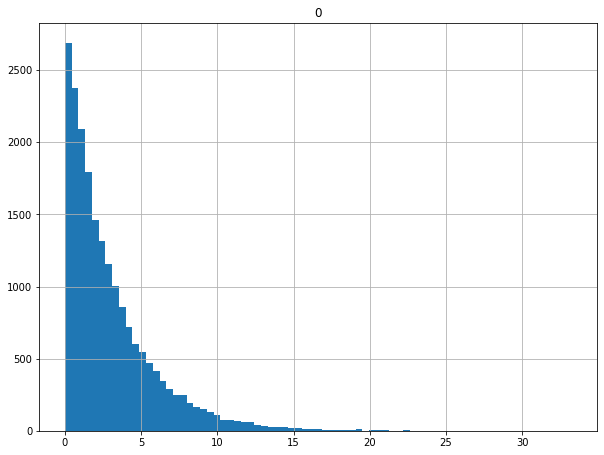

In [30]:
# helps handle skewed data 
# Original data to apply log transform must have only positive values

sk_df = pd.DataFrame(np.random.exponential(scale=3, size=20000))
sk_df.hist(figsize=(10, 7.5), bins=75)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf321b51d0>]],
      dtype=object)

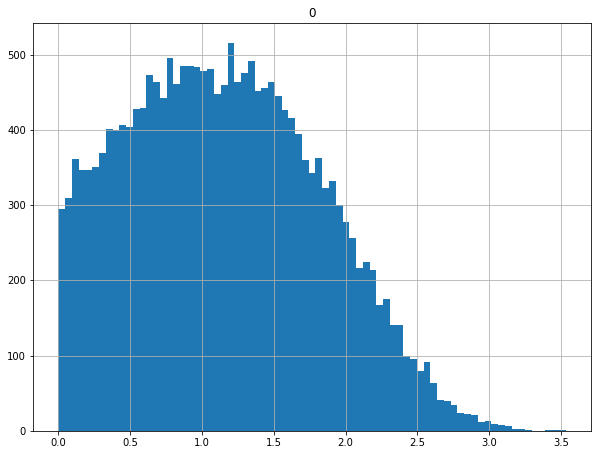

In [31]:
lg_df = (sk_df + 1).transform(np.log)
lg_df.hist(figsize=(10, 7.5), bins=75)

### One Hot Encoding

In [32]:
data = pd.DataFrame({'Team':['Eagles', 'Bears', 'Raptors', 'Hornets', 'Bees', 'Lions'],
                     'City':['Rome', 'Helsinki', 'Hong Kong', 'Hong Kong', 'Rome', 'Rome'],
                     'Games':[12, 15,23, 18, 21, 8],
                     'MVP_Player':['John Stuart', 'Leo Da Vinci', 'Mike Donatello', 'Raphael Dolce', 'Bruce Lee', 'Mahatma Gandhi']})

data.head()

,Team,City,Games,MVP_Player
0,Eagles,Rome,12,John Stuart
1,Bears,Helsinki,15,Leo Da Vinci
2,Raptors,Hong Kong,23,Mike Donatello
3,Hornets,Hong Kong,18,Raphael Dolce
4,Bees,Rome,21,Bruce Lee


In [33]:
one_hot_encoding = pd.get_dummies(data['City'])
one_hot_encoding

,Helsinki,Hong Kong,Rome
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


### Group Operations

In [34]:
data.groupby('City')['Games'].sum()

City
Helsinki     15
Hong Kong    41
Rome         41
Name: Games, dtype: int64

In [35]:
data.groupby('City')['Team'].count()

City
Helsinki     1
Hong Kong    2
Rome         3
Name: Team, dtype: int64

In [36]:
import seaborn as sns

flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [37]:
flights = flights.pivot('month', 'year', 'passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### Feature Split

In [38]:
data['MVP_Player'].str.split(' ').map(lambda x: x[0])

0       John
1        Leo
2       Mike
3    Raphael
4      Bruce
5    Mahatma
Name: MVP_Player, dtype: object

### Scaling

In [39]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)

scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [40]:
# standardization
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(data)

scaler.transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

### Extracting Date

In [41]:
from datetime import date
data = pd.DataFrame({'date':['14-08-1983', '23-05-2015']})

data.head()

,date
0,14-08-1983
1,23-05-2015


In [42]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data.head()

,date
0,1983-08-14
1,2015-05-23


In [43]:
data['date'].dt.year

0    1983
1    2015
Name: date, dtype: int64

In [44]:
print(f"Years \n {data['date'].dt.year}, Months \n {data['date'].dt.month}, Days \n {data['date'].dt.day}")

Years 
 0    1983
1    2015
Name: date, dtype: int64, Months 
 0    8
1    5
Name: date, dtype: int64, Days 
 0    14
1    23
Name: date, dtype: int64


In [45]:
data.date.dt.day_name()

0      Sunday
1    Saturday
Name: date, dtype: object